### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.

##  Yusuf Demir 2210356074

# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [81]:
df=pd.read_csv("portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,28,9.0,0,2.0,1,1055,1,1,1.0,28,1,196,1,-1,0,0.0,1
1,36,4.0,1,2.0,1,520,2,1,0.0,23,5,110,2,-1,0,0.0,1
2,38,2.0,0,3.0,1,1314,2,2,1.0,16,7,378,2,-1,0,0.0,1
3,41,9.0,1,3.0,1,28,2,1,1.0,4,2,358,2,-1,0,0.0,1
4,27,2.0,0,3.0,1,290,1,1,1.0,10,8,88,1,-1,0,0.0,1


### 2. calculate correlation between target variable 'y' and other features (5 points)

In [82]:
# Check the column names and data types
print("Columns and Data Types:")
print(df.info())

# Check for missing values in the dataset
print("\nMissing Values Analysis:")
print(df.isnull().sum())

Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10578 non-null  int64  
 1   job          10578 non-null  float64
 2   marital      10578 non-null  int64  
 3   education    10578 non-null  float64
 4   default      10578 non-null  int64  
 5   balance      10578 non-null  int64  
 6   housing      10578 non-null  int64  
 7   loan         10578 non-null  int64  
 8   contact      10578 non-null  float64
 9   day_of_week  10578 non-null  int64  
 10  month        10578 non-null  int64  
 11  duration     10578 non-null  int64  
 12  campaign     10578 non-null  int64  
 13  pdays        10578 non-null  int64  
 14  previous     10578 non-null  int64  
 15  poutcome     10578 non-null  float64
 16  y            10578 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 1.4 MB
None

Missing Valu

In [83]:
# Calculate the correlation matrix for all features
# Focus on the correlation of 'y' with other features
correlation_matrix = df.corr()
y_correlation = correlation_matrix["y"].sort_values(ascending=False)

# Display the features with the highest and lowest correlation to the target feature 'y'
print("\nCorrelation of 'y' with other features:")
print(y_correlation)

# Select the two features with the highest correlation (excluding 'y' itself)
highest_corr_features = y_correlation.index[1:3]  # Skip the first as it's 'y' itself
print(f"\nFeatures with the highest correlation to 'y': {highest_corr_features.tolist()}")

# Select features with the lowest correlation to the target variable 'y'
# Here, "lowest correlation" means closest to zero
lowest_corr_features = y_correlation.abs().sort_values().index[0:2]
print(f"Features with the lowest correlation to 'y': {lowest_corr_features.tolist()}")


Correlation of 'y' with other features:
y              1.000000
duration       0.443087
poutcome       0.291850
contact        0.219086
pdays          0.153807
balance        0.088308
previous       0.087656
education      0.082672
age            0.040038
month          0.031213
job            0.022716
default       -0.035414
day_of_week   -0.042603
marital       -0.062501
loan          -0.118816
campaign      -0.133147
housing       -0.213409
Name: y, dtype: float64

Features with the highest correlation to 'y': ['duration', 'poutcome']
Features with the lowest correlation to 'y': ['job', 'month']


* ___High correlation features help in building effective models as they strongly relate to the target variable.___
* ___Low correlation features allow us to test how the model performs when unrelated features are included, aiding in understanding model behavior with irrelevant data___

# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choose the two most correlated features with target feature 'y' 

In [84]:
# Select two most correlated features and the target
feature1, feature2 = highest_corr_features
X = df[[feature1, feature2]]
y = df["y"]

# Check class distribution
print("Class distribution in target variable:")
print(y.value_counts())


# Recode the target variable to 0 and 1
df["y"] = df["y"].apply(lambda x: 0 if x == 1 else 1)
print("Updated class distribution in target variable:")
y = df["y"]
print(y.value_counts())

Class distribution in target variable:
y
1    5289
2    5289
Name: count, dtype: int64
Updated class distribution in target variable:
y
0    5289
1    5289
Name: count, dtype: int64


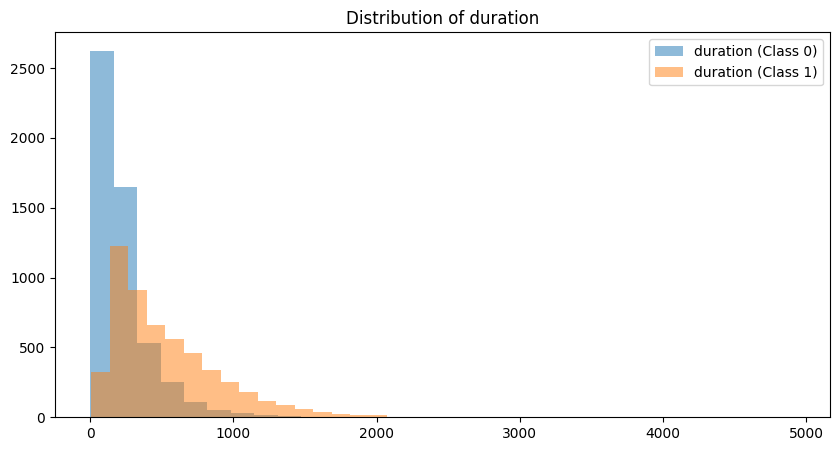

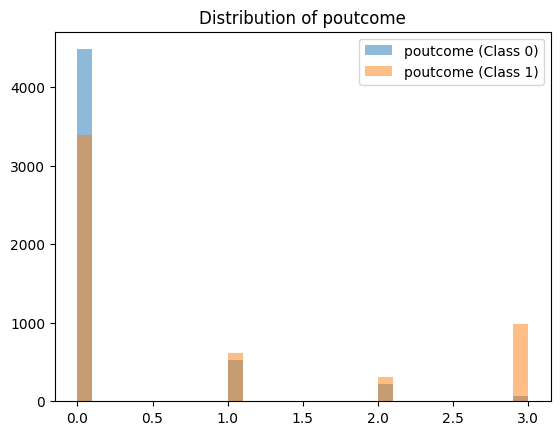

In [85]:
# Plot the distribution of the selected features by class

plt.figure(figsize=(10, 5))
for feature in [feature1, feature2]:
    for cls in [0, 1]:
        subset = df[df["y"] == cls]
        plt.hist(subset[feature], bins=30, alpha=0.5, label=f'{feature} (Class {cls})')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In [86]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Apply the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the logistic regression model."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zero
        self.bias = 0  # Initialize bias to zero

        # Gradient Descent
        for i in range(self.iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Make predictions using the trained model."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]


Split the dataset into a training set and a validation set (80% training and 20% validation).

In [87]:
# Split the dataset into an 80% training set and a 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")

Training set size: 8462 samples
Validation set size: 2116 samples


Scale the features using StandardScaler

In [88]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# Scale the validation set using the same scaler
X_val = scaler.transform(X_val)

* Initialize and train the custom logistic regression model

In [89]:
# Initialize the logistic regression model
model = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)

# Train the model
model.fit(X_train, y_train)

* Make predictions on the validation set

In [90]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [91]:
# Calculate performance metrics

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Logistic Regression Model Performance:
Accuracy: 0.7561
Precision: 0.8004
Recall: 0.6824
F1 Score: 0.7367

Confusion Matrix:
[[878 180]
 [336 722]]


In [92]:
# Generate and print the classification report
report = classification_report(y_val, y_pred, target_names=["Class 0", "Class 1"])
print("\nClassification Report:")
print(report)

# Print the confusion matrix for reference
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.83      0.77      1058
     Class 1       0.80      0.68      0.74      1058

    accuracy                           0.76      2116
   macro avg       0.76      0.76      0.75      2116
weighted avg       0.76      0.76      0.75      2116


Confusion Matrix:
[[878 180]
 [336 722]]


* ___The classification report shows balanced precision and recall across both classes, with slightly better performance for Class 1 in terms of precision and for Class 0 in terms of recall. Overall, the model performs satisfactorily but leaves room for improvement in reducing misclassifications.___

### Print decision boundaries as in PA1 (5 points)

C:\Users\demir\AppData\Local\Temp\ipykernel_19940\2973224498.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')


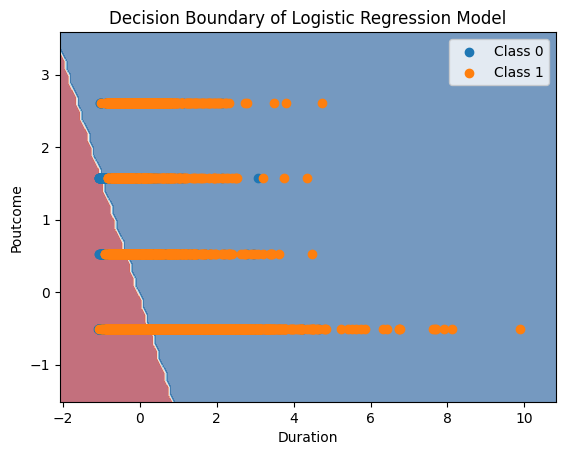

In [93]:
# Function to plot the decision boundary for Logistic Regression
def plot_decision_boundary_logistic(X, y, weights, bias, xlabel = "Feature 1", ylabel = "Feature 2", plot_title="Decision Boundary of Logistic Regression Model"):
    # Define the bounds of the domain
    min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
    min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    # Create all the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)

    # Flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # Stack the vectors to create a (N, 2) array for input to the model
    grid = np.hstack((r1, r2))

    # Calculate predictions for the grid using the logistic regression model
    linear_combination = np.dot(grid, weights) + bias
    probabilities = 1 / (1 + np.exp(-linear_combination))  # Sigmoid function
    zz = (probabilities >= 0.5).astype(int)  # Classify based on threshold 0.5

    # Reshape the predictions back into a grid
    zz = zz.reshape(xx.shape)

    # Plot the decision boundary using contourf
    plt.contourf(xx, yy, zz, cmap='RdBu', alpha=0.6)

    # Scatter plot for the original data points
    for class_value in range(2):
        # Get the row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # Create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')

    # Add plot title and labels
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Use the function with your model
plot_decision_boundary_logistic(X_train, y_train.values, model.weights, model.bias, xlabel="Duration", ylabel="Poutcome")

# 1.2 Implementing Logistic Regression using all features. 

* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [94]:
# Step 1: Redefine the input and target variables
X_all = df.drop(columns=["y"])  # Use all features except the target 'y'
y_all = df["y"]  # Target variable

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [95]:
# Step 2: Split the dataset into an 80% training set and a 20% validation set
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all)

* Scale the features using StandardScaler

In [96]:
# Step 3: Scale the features using StandardScaler
scaler_all = StandardScaler()
X_train_all = scaler_all.fit_transform(X_train_all)
X_val_all = scaler_all.transform(X_val_all)

### Initialize and train the custom logistic regression model.

In [97]:
# Step 4: Initialize and train the custom logistic regression model
model_all = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)
model_all.fit(X_train_all, y_train_all)

### Print decision boundaries as in PA1 (5 points)

* Make predictions on the validation set

In [98]:
# Step 5: Make predictions on the validation set
y_pred_all = model_all.predict(X_val_all)

### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [99]:
# Step 6: Evaluate the model's performance
accuracy_all = accuracy_score(y_val_all, y_pred_all)
precision_all = precision_score(y_val_all, y_pred_all)
recall_all = recall_score(y_val_all, y_pred_all)
f1_all = f1_score(y_val_all, y_pred_all)

# Print performance metrics
print("Logistic Regression Model Performance (All Features):")
print(f"Accuracy: {accuracy_all:.4f}")
print(f"Precision: {precision_all:.4f}")
print(f"Recall: {recall_all:.4f}")
print(f"F1 Score: {f1_all:.4f}")

# Confusion Matrix
conf_matrix_all = confusion_matrix(y_val_all, y_pred_all)
print("\nConfusion Matrix:")
print(conf_matrix_all)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val_all, y_pred_all))

Logistic Regression Model Performance (All Features):
Accuracy: 0.8010
Precision: 0.8132
Recall: 0.7817
F1 Score: 0.7971

Confusion Matrix:
[[868 190]
 [231 827]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1058
           1       0.81      0.78      0.80      1058

    accuracy                           0.80      2116
   macro avg       0.80      0.80      0.80      2116
weighted avg       0.80      0.80      0.80      2116



### Print decision boundaries as in PA1. Briefly explain the impact of the number of features on the learning ability of the model. (5 points)

___Conclusion:
Using all features has indeed improved the model's performance, especially in terms of recall and overall accuracy. However, the model with the two most correlated features performed quite well, showing that focusing on the most relevant features can sometimes be equally effective. The improvement suggests that additional features bring more informative patterns to the model, which can enhance its learning ability and predictive power.___

___Impact of the Number of Features on Model Learning:
Increasing the number of features allows the model to capture more information about the data, potentially improving its performance by considering more aspects of the input space. However, too many features might lead to overfitting, where the model performs well on the training data but poorly on unseen data. In this case, using all features has improved the model, but careful feature selection and regularization are key to balancing model complexity and generalization ability.___

# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn 

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in this task

In [101]:
# Step 1: Define features and target
X = df.drop("y", axis=1)  # Use all features except the target
y = df["y"]

### Print decision boundaries as in PA1 (5 points)

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [102]:
# Step 2: Split the dataset into an 80% training and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

* Scale the features using StandardScaler

In [103]:
# Step 3: Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

#### Implement GridSearchCV  (5 points) 

In [104]:
# Step 4: Implement GridSearchCV for hyperparameter optimization
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],  # Choosing between different SVM kernels
    'gamma': ['scale', 'auto']  # gamma for RBF and poly kernels
}

svm_model = SVC()

* Initialize the SVM classifier

In [105]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

* Train the SVM classifier with the best parameters found from grid search


In [106]:
# Best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters from GridSearchCV: {best_params}")

# Step 5: Train the SVM classifier with the best hyperparameters
best_svm_model = grid_search.best_estimator_

Best parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


* Make predictions on the validation set using the best model


In [107]:
# Step 6: Make predictions on the validation set
y_pred = best_svm_model.predict(X_val)

#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

In [108]:
# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("SVM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, we can print the classification report if needed
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

SVM Model Performance:
Accuracy: 0.8360
Precision: 0.8177
Recall: 0.8648
F1 Score: 0.8406

Confusion Matrix:
[[854 204]
 [143 915]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1058
           1       0.82      0.86      0.84      1058

    accuracy                           0.84      2116
   macro avg       0.84      0.84      0.84      2116
weighted avg       0.84      0.84      0.84      2116



## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y' 

In [109]:
# Step 1: Select the two most correlated features with the target variable 'y'
# Replace 'feature1' and 'feature2' with the actual feature names.
feature1, feature2 = highest_corr_features  # Use the actual names of the most correlated features

X = df[[feature1, feature2]]  # Select only the two most correlated features
y = df["y"]

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [110]:
# Step 2: Split the dataset into an 80% training and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

* Scale the features using StandardScaler

In [111]:
# Step 3: Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV 

In [112]:
# Step 4: Initialize the SVM classifier with the best hyperparameters found from GridSearchCV
svm_model = SVC(C=1, kernel='rbf', gamma='scale')

* Train the SVM classifier

In [113]:
# Step 5: Train the SVM classifier
svm_model.fit(X_train, y_train)

SVC(C=1)

* Make predictions on the validation set

In [114]:
# Step 6: Make predictions on the validation set
y_pred = svm_model.predict(X_val)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [115]:
# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("SVM Model Performance (Most Correlated Features):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

SVM Model Performance (Most Correlated Features):
Accuracy: 0.7755
Precision: 0.8040
Recall: 0.7287
F1 Score: 0.7645

Confusion Matrix:
[[870 188]
 [287 771]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1058
           1       0.80      0.73      0.76      1058

    accuracy                           0.78      2116
   macro avg       0.78      0.78      0.78      2116
weighted avg       0.78      0.78      0.78      2116



##### Visualize decision boundary and support vectors (5 points)

C:\Users\demir\AppData\Local\Temp\ipykernel_19940\2309181133.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')


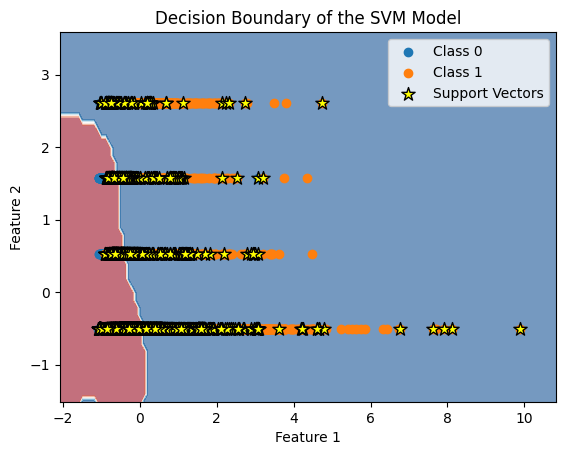

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Function to plot decision boundary and support vectors
def plot_decision_boundary_svm(X, y, model, plot_title="Decision Boundary of the SVM Model"):
    # Define the bounds of the domain
    min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
    min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    # Create all the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)

    # Flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # Stack the vectors to create a (N, 2) array for input to the model
    grid = np.hstack((r1, r2))

    # Make predictions for the grid
    zz = model.predict(grid)
    
    # Reshape the predictions back into a grid
    zz = zz.reshape(xx.shape)

    # Plot the decision boundary using contourf
    plt.contourf(xx, yy, zz, cmap='RdBu', alpha=0.6)

    # Scatter plot for the original data points
    for class_value in range(2):
        # Get the row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # Create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')

    # Highlight support vectors with a distinct marker
    support_vectors = model.support_  # Get the support vectors
    plt.scatter(X[support_vectors, 0], X[support_vectors, 1], color='yellow', edgecolors='black', s=100, label="Support Vectors", marker='*')

    # Add plot title and labels
    plt.title(plot_title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Use this function to plot the decision boundary and support vectors
plot_decision_boundary_svm(X_train, y_train, svm_model)

## 2.3 implementing svm with least correlated 2 features (10 points) 

#### Choose the two least correlated features with target feature 'y' 

In [117]:
feature1, feature2 = lowest_corr_features  # Use the actual names of the least correlated features

X_least = df[[feature1, feature2]]  # Select only the two least correlated features
y_least = df["y"]

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [118]:
# Split the dataset into training (80%) and validation (20%)
X_train_least, X_val_least, y_train_least, y_val_least = train_test_split(X_least, y_least, test_size=0.2, random_state=42, stratify=y_least)

* Scale the features using StandardScaler

In [119]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_least = scaler.fit_transform(X_train_least)
X_val_least = scaler.transform(X_val_least)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV 

In [120]:
# Initialize the SVM model
svm_least = SVC(C=1, kernel='rbf', gamma='scale')

* Train the SVM classifier

In [121]:
# Train the SVM model
svm_least.fit(X_train_least, y_train_least)

SVC(C=1)

* Make predictions on the validation set

In [122]:
# Make predictions on the validation set
y_pred_least = svm_least.predict(X_val_least)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [123]:
accuracy_least = accuracy_score(y_val_least, y_pred_least)
precision_least = precision_score(y_val_least, y_pred_least)
recall_least = recall_score(y_val_least, y_pred_least)
f1_least = f1_score(y_val_least, y_pred_least)

print("SVM Model Performance (Least Correlated Features):")
print(f"Accuracy: {accuracy_least:.4f}")
print(f"Precision: {precision_least:.4f}")
print(f"Recall: {recall_least:.4f}")
print(f"F1 Score: {f1_least:.4f}")

# Confusion Matrix
conf_matrix_least = confusion_matrix(y_val_least, y_pred_least)
print("\nConfusion Matrix:")
print(conf_matrix_least)

# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_val_least, y_pred_least))

SVM Model Performance (Least Correlated Features):
Accuracy: 0.6011
Precision: 0.6379
Recall: 0.4679
F1 Score: 0.5398

Confusion Matrix:
[[777 281]
 [563 495]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.73      0.65      1058
           1       0.64      0.47      0.54      1058

    accuracy                           0.60      2116
   macro avg       0.61      0.60      0.59      2116
weighted avg       0.61      0.60      0.59      2116



##### Visualize decision boundary and support vectors(5 points)

C:\Users\demir\AppData\Local\Temp\ipykernel_19940\2309181133.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')


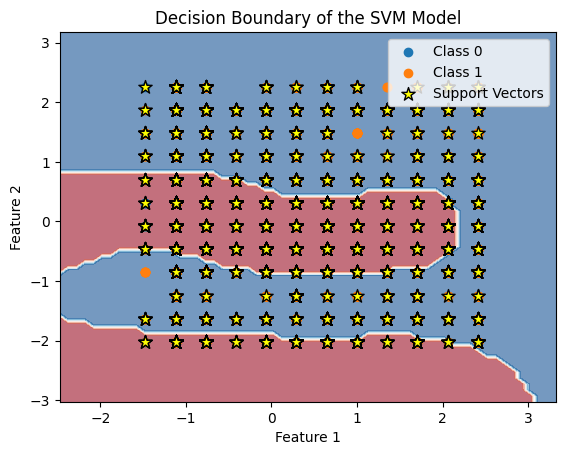

In [124]:
# Visualize the decision boundary and support vectors for the least correlated features
plot_decision_boundary_svm(X_train_least, y_train_least, svm_least)

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)

In [125]:
# Results for Logistic Regression
log_reg_results = {
    "Model": "Logistic Regression",
    "Accuracy": 0.8010,
    "Precision": 0.8132,
    "Recall": 0.7817,
    "F1 Score": 0.7971
}

# Results for SVM
svm_results = {
    "Model": "SVM",
    "Accuracy": 0.8360,
    "Precision": 0.8177,
    "Recall": 0.8648,
    "F1 Score": 0.8406
}

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame([log_reg_results, svm_results])

# Display the comparison table
print(comparison_df)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.801     0.8132  0.7817    0.7971
1                  SVM     0.836     0.8177  0.8648    0.8406


___The SVM model generally outperforms the Logistic Regression model in all evaluated metrics, particularly in recall and F1 score, showing that it is better at identifying positive instances while maintaining a good balance between precision and recall. The Logistic Regression model still provides a strong performance, but the SVM model is the better choice in this scenario.___

___SVM is typically preferred for datasets with high-dimensional features, especially when the decision boundary between classes is not linear. It performs well when there is a clear margin of separation and is effective in handling complex, non-linear relationships using kernel methods. On the other hand, Logistic Regression is suitable for datasets with fewer features or when the relationship between the features and the target is roughly linear. It is less computationally expensive than SVM and performs well on smaller datasets with linearly separable classes. In cases where interpretability is crucial, Logistic Regression is often favored.___

# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing 

### import other necessary libraries

In [126]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [127]:
df2=pd.read_csv("weights_bmi_6classes_updated.csv", encoding="utf-8")

df2.head()

,BMI_CLASS,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,SE,FLAG
0,1,1,1,1.1,1,1.0,41.6,0.8,0
1,1,1,1,1.1,2,1.0,33.0,0.8,0
2,1,1,1,1.1,3,1.0,32.3,0.7,0
3,1,1,1,1.1,4,1.0,31.6,0.8,0
4,1,1,1,1.1,5,1.0,30.8,0.7,0


* Define features and target variable, you will use all features of dataset in this task

In [128]:
print(df2.columns)

Index(['BMI_CLASS', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM',
       'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG'],
      dtype='object')


In [129]:
print(df2.dtypes)

BMI_CLASS           int64
UNIT_NUM            int64
STUB_NAME_NUM       int64
STUB_LABEL_NUM    float64
YEAR_NUM            int64
AGE_NUM           float64
ESTIMATE          float64
SE                float64
FLAG                int64
dtype: object


In [130]:
# Define features (X) and target (y)
X = df2.drop("BMI_CLASS", axis=1) # Replace "target" with the actual column name of the target variable
y = df2["BMI_CLASS"]

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [131]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")

Training set size: 2688 samples
Validation set size: 672 samples


* Initialize the Decision Tree classifier

In [132]:
# Initialize the Decision Tree classifier
tree_model = DecisionTreeClassifier(max_depth=7, random_state=42)  # You can adjust max_depth and other hyperparameters

* Train the Decision Tree classifier

In [133]:
# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

* Make predictions on the validation set

In [134]:
# Make predictions
y_pred = tree_model.predict(X_val)

#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)

In [135]:
# Print classification metrics
print("Decision Tree Model Performance:")
print(classification_report(y_val, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Decision Tree Model Performance:
              precision    recall  f1-score   support

           1       0.43      0.39      0.41       112
           2       0.93      0.82      0.87       112
           3       0.64      0.67      0.65       112
           4       0.63      0.79      0.70       112
           5       0.59      0.58      0.58       112
           6       0.74      0.66      0.70       112

    accuracy                           0.65       672
   macro avg       0.66      0.65      0.65       672
weighted avg       0.66      0.65      0.65       672


Confusion Matrix:
[[44  3 35 22  8  0]
 [ 9 92  4  5  2  0]
 [16  1 75 14  6  0]
 [13  0  4 89  6  0]
 [11  2  0  8 65 26]
 [10  1  0  3 24 74]]


#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


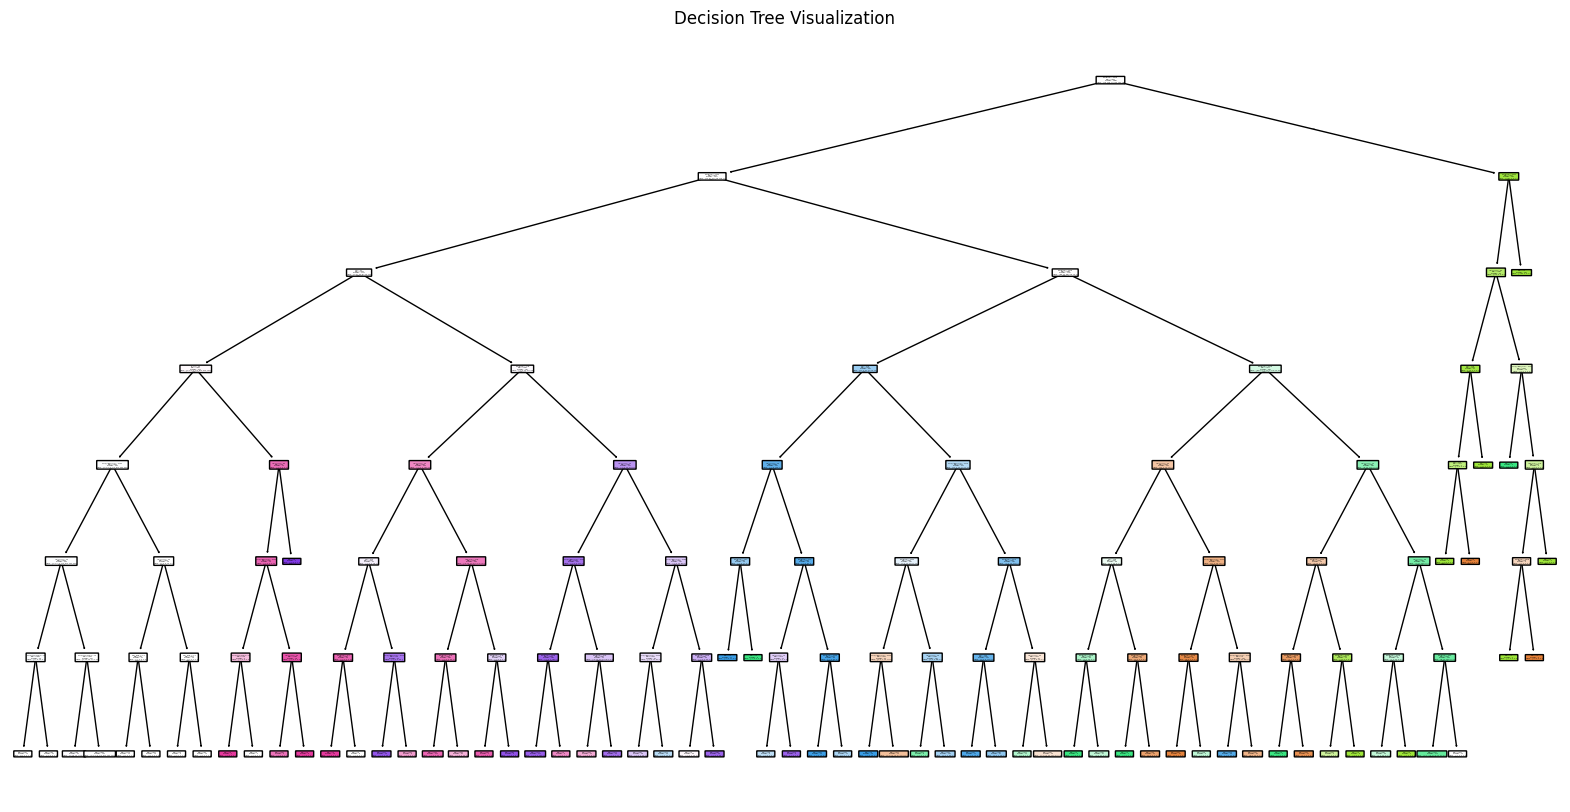

In [136]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(cls) for cls in tree_model.classes_],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Tree depth refers to the number of levels in a decision tree, starting from the root node to the deepest leaf node. A greater depth enables the tree to split data into finer subgroups, improving its ability to fit the training data. However, this comes at the cost of higher risk of overfitting, where the model becomes overly specialized to the training data and performs poorly on unseen data. Hence, choosing the right tree depth is a balance between achieving good accuracy and maintaining simplicity for better interpretability.

___We intentionally limited the tree depth to ensure the visualization remains interpretable and easy to analyze. While increasing the tree depth could potentially improve accuracy by allowing the model to capture more intricate patterns in the data, it would also make the tree more complex and harder to read.___

### Explain briefly the question. What is the role of gini in decision tree? (10 points)

* ___Gini is one of the metrics used to measure the quality of a split at each node of the tree. It evaluates how well a particular feature separates the classes in the dataset.___

* The Gini Index (or Gini Impurity) is a criterion for splitting nodes in a decision tree. It calculates the impurity of a dataset by measuring the likelihood of incorrect classification of a randomly chosen sample, assuming the sample is classified according to the distribution of labels in the node. The formula is:
    $$Gini = 1 - \sum_{i=1}^{n} p_i^2$$
where 𝑝_𝑖 is the probability of class i at the node. A lower Gini value indicates a purer node, meaning samples are more likely to belong to a single class. During training, the decision tree algorithm selects the split that minimizes Gini impurity to improve classification accuracy.

    